# Project Description
Online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


# Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
# !pip install squarify
# import squarify
from scipy import stats as st
# import requests #
# import bs4
# from bs4 import BeautifulSoup
# import re
# from threading import Thread
# import pandas.util.testing as tm
%matplotlib inline

In [2]:
# df:
games = pd.read_csv('/content/games.csv')

In [3]:
# drop dupps:
games = games.drop_duplicates()

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


- from the df above we get total of 16715 rows & 11 columns

- missing values noted in last Rating, user score, critic score genere and release year

- not noted: in the sales columns we might get zeros 

- Year_of_Release - will be changed to integer (datetime variable will not be useful and we can trat the year as an integer as well for this data frame)

In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- as mentioned above - zeros are extremely notable within the data frame

- 50% of JP sales are filled with zeros only. we can say the same for NA (0.00) & EU (0.02) sales as well


In [6]:
# a look to object data types
games.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [7]:
# platform check
games['Platform'].value_counts(normalize=True) * 100 # in percents

PS2     12.928507
DS      12.868681
PS3      7.962908
Wii      7.897098
X360     7.550105
PSP      7.233024
PS       7.161232
PC       5.827101
XB       4.929704
GBA      4.917739
GC       3.326354
3DS      3.110978
PSV      2.572540
PS4      2.345199
N64      1.908465
XOne     1.477715
SNES     1.429853
SAT      1.034999
WiiU     0.879450
2600     0.795692
NES      0.586300
GB       0.586300
DC       0.311098
GEN      0.173497
NG       0.071792
WS       0.035896
SCD      0.035896
3DO      0.017948
TG16     0.011965
PCFX     0.005983
GG       0.005983
Name: Platform, dtype: float64

In [8]:
# genere check
games['Genre'].value_counts()
# no strange values here

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
# user score check
games['User_Score'].sort_values().value_counts(normalize=True)

tbd    0.242061
7.8    0.032355
8      0.028959
8.2    0.028161
8.3    0.025364
         ...   
0.6    0.000200
1.3    0.000200
2.3    0.000200
9.7    0.000100
0      0.000100
Name: User_Score, Length: 96, dtype: float64

In [10]:
games[games['User_Score'] == 'tbd'].groupby('Year_of_Release').count()['Name']
# there games older than the other with to be determined user score

Year_of_Release
1997.0      1
1999.0      8
2000.0     43
2001.0     82
2002.0    192
2003.0     95
2004.0    107
2005.0    121
2006.0    124
2007.0    192
2008.0    326
2009.0    405
2010.0    331
2011.0    217
2012.0     24
2013.0     15
2014.0     21
2015.0     38
2016.0     34
Name: Name, dtype: int64

- 12  geners in total whereas DS+PS2 is almost 1/4 of the whole data set. 2161 rows of PS2 are about 12%
- many small platfo with less than 1% of all data set. might indicate that these are od consoles that no longer in use anymore and belong to the past
- almost 1/4 of user scores are 'tbd'whereas zero is not that common amont this col

In [11]:
# check on the Genre nan values
games[games['Genre'].isna()]
# noted that these are the same lines for both Genre col and Name col
# we do have a lot of data missing which is making it hard to work with
# might be a dupp or typo rows
# I will delete these rows nevertheless

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
games = games[~games['Genre'].isna()]

In [13]:
games.shape
# we are good and down by 2 rows

(16713, 11)

In [14]:
# a loot to Rating
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
games['Rating'].isna().sum() # a lot of Ratings nan values

6764

In [16]:
# first look at the data
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8730,Bomberman,PSP,2006.0,Puzzle,0.14,0.00,0.0,0.01,73.0,7,E
12479,Bubble Bobble: Old & New,GBA,2002.0,Puzzle,0.04,0.02,0.0,0.00,NaN,NaN,NaN
4431,Grind Session,PS,2000.0,Sports,0.24,0.17,0.0,0.03,NaN,NaN,NaN
14588,Who Wants to be a Millionaire: 1st Edition,Wii,2007.0,Misc,0.00,0.03,0.0,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.0,0.00,59.0,5.8,T


# Step 2. Prepare the data

In [17]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

## col name + data going lowercase & col variable types **define**

In [18]:
games.columns = games.columns.str.lower() # lower columns

In [19]:
games = games.apply(lambda x: x.str.lower() if x.dtypes == 'object' else x) # lower data

In [20]:
games['name'].value_counts()
# I will take a loot into need for speed: most wanted only 

need for speed: most wanted               12
lego marvel super heroes                   9
ratatouille                                9
madden nfl 07                              9
fifa 14                                    9
                                          ..
tantei jinguuji saburo: hai to diamond     1
blazblue: calamity trigger portable        1
godzilla unleashed                         1
devil survivor: over clock                 1
e.t. the extra-terrestrial                 1
Name: name, Length: 11559, dtype: int64

In [21]:
games[games['name'] == 'need for speed: most wanted']
# was intresting to check if we got dupps in rows 1190 & 1591 which seems to be ok
# in year 2005 and 2012 the same game was released in many platforms as well
# overall should be ok

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,t
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,t
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,t
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,t
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,t
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,t
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,e


## year_of_release

In [22]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'],format='%Y',errors='coerce').dt.strftime('%Y') # year to integer

In [23]:
print(games['year_of_release'].isna().sum()) # number of nan rows

games[games['year_of_release'].isna()] # a look into the data

269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,e10+
16405,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,t
16448,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,m
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
games['year_of_release'] = games.groupby('name')['year_of_release'].transform('first')

In [25]:
games['year_of_release'].isna().sum()
# reduced to 146

146

- there are games which got year as indicater to date release

In [26]:
# get number from name columns
# will use new df variable
games_no_year = games[games['year_of_release'].isna()]
games_no_year['year_of_release'] = games_no_year.name.str.extract('(\d+)', expand=False).astype('int',errors='ignore')
print(games_no_year['year_of_release'].isna().sum())
print(games_no_year['year_of_release'])

118
475      2006
627       NaN
657       NaN
805       NaN
1142      NaN
         ... 
16277     NaN
16288     NaN
16348     NaN
16458     NaN
16522     NaN
Name: year_of_release, Length: 146, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


---
 `OF THE RECORD`
- another way dealing missing release year:

the below built functions was build in order to get the year release of each game seperatly using web scraping 


In [27]:
# def missing_year_game(row):
#   name = str(row['name']) # games name
#   redate = " release date" 
#   plat = str(row['platform']) # platform
#   name_redate = name + redate + " " + plat # all together
#   url = 'https://www.google.com/search?q='+name_redate # building url
#   # going to google it using soup liabrary:  
#   headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36"}
#   source_code = requests.get(url, headers=headers)
#   soup = BeautifulSoup(source_code.text, "lxml")
#   googlit = soup.find('div', attrs = {'class': 'Z0LcW XcVN5d'}) 
#   #print(googlit)
#   try:
#     # print(1) # use for check
#     return (googlit.get_text().split(" ")[-1])
#   except:
#     # print(2) # use for check
#     return ""
# games_no_year['year_of_release'] = games_no_year.apply(missing_year_game,axis=1) # applying to column    

# # print(googlit.get_text(strip=True, separator='|').split('|')[:3]) # below can be disregarded

the main issue of the above is that for the 259 rows the running time is VERY VERY slow (vary but can take 8-10 minutes) and when using this one we only remain with about 80 rows with no release year

---



In [28]:
games_no_year = games_no_year[~games_no_year['year_of_release'].isna()] # dropping all nan

In [29]:
games_no_year = games_no_year[games_no_year.year_of_release.str.len() == 4] # all with 4 digit year only

In [30]:
games_no_year['year_of_release'] = games_no_year['year_of_release'].astype(int) -1 
# lower by one year since all remaining are sports only (this rule applies to existing sports games for almost 99%)

In [31]:
games_no_year.head(5) # ok

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,2005,fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
4775,nfl gameday 2003,ps2,2002,sports,0.20,0.15,0.0,0.05,60.0,tbd,e
5655,all-star baseball 2005,ps2,2004,sports,0.16,0.12,0.0,0.04,72.0,8.6,e
8918,all-star baseball 2005,xb,2004,sports,0.11,0.03,0.0,0.01,75.0,8.8,e
13195,tour de france 2011,x360,2010,racing,0.00,0.04,0.0,0.01,46.0,7.6,NaN


combine both data frames:

In [32]:
games.dropna(subset=['year_of_release'],inplace=True)

In [33]:
games = pd.concat([games,games_no_year]) # concat both data

In [34]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [35]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16079
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       9938 non-null   object 
 10  rating           9871 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [36]:
games['year_of_release'].value_counts() # seems ok

2008    1433
2009    1426
2010    1265
2007    1208
2011    1167
2006    1017
2005     935
2002     829
2004     785
2003     747
2012     672
2015     581
2014     551
2013     535
2001     526
2016     475
1998     401
2000     353
1999     331
1997     301
1996     275
1995     212
1994     149
1993      61
1992      52
1991      50
1981      44
1982      37
1986      24
1989      21
1983      19
1985      17
1984      16
1987      16
1990      15
1988      14
1980      14
Name: year_of_release, dtype: int64

## critic_score

In [37]:
np.sort(games['critic_score'].unique()) # no more than 100

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [38]:
len(games[games['critic_score'].isna()])

8495

In [39]:
games['critic_score'] = games.groupby('name')['critic_score'].transform('first')

In [40]:
len(games[games['critic_score'].isna()])


7535

- managed to reduce by using existing scores

- for the rest missing values within critic score it is important to mention that it's a subjective parameter for each game per platform

## user_score

In [41]:
games['user_score'].unique()
# got nan & 'tbd' in this col

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [42]:
# will take a look into 'tbd' only to decide how old the games are
games.loc[games['user_score'] == 'tbd'].groupby('year_of_release').count()['name']

year_of_release
1980      2
1982      1
1993      1
1994      1
1997      1
1998      2
1999     11
2000     52
2001     95
2002    180
2003     91
2004    111
2005    122
2006    120
2007    198
2008    333
2009    400
2010    327
2011    212
2012     27
2013     15
2014     21
2015     40
2016     32
Name: name, dtype: int64

In [43]:
games['user_score'] = games['user_score'].replace('tbd',np.NaN) #replace

In [44]:
games['user_score'] = games['user_score'].astype('float') # make it as float only
np.sort(games['user_score'].astype('float').unique()) # no more than 10 - ok

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [45]:
games['user_score'].isna().sum()

9031

In [46]:
games['user_score'] = games.groupby('name')['user_score'].transform('first')

In [47]:
games['user_score'].isna().sum()

7932

- most of the games are old. for example games from 2010 will probably wont be determined anyway and we clearly can count on this as missing value
- for more new games like 2016 and even 2015 it seems the the score yet to be dermined but it is not the majority and being only small portion from all the data set and I think it will be the best to count them as missing and unknown values as well
- managed to reduce by 400 by using existing rows user score from other platforms assuming that the games wont change much
- regarding other missing value (NaN) will remain as missing values since it is as well as critic score - hard to decide what is correct score because of score being a subjective matter

## rating

In [48]:
games['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [49]:
pd.set_option('max_colwidth',400)

In [50]:
# find the meaning of each rate from wikipedia using read_htnml:
url = 'https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board'
rate_mean=pd.read_html(url, header=[0],flavor='bs4')[1]
rate_mean.drop(columns='Icon',inplace=True)
rate_mean

,Rating,Years active,Description
0,Rating Pending (RP),1994–present[18],This symbol is used in promotional materials for games which have not yet been assigned a final rating by the ESRB.[21][46]
1,Early Childhood (EC),1994–2018[18][47],"Games with this rating contain content which is aimed towards a preschool audience. They do not contain content that parents would find objectionable to this audience.[21][46] No longer used as of 2018 due to few titles using this, and all titles with this rating are replaced with the E rating."
2,Everyone (E),1994–present[18],"Games with this rating contain content which the ESRB believes is ""generally suitable for all ages"".[46] They can contain content such as infrequent use of ""mild""/cartoon violence and mild language.[21][46] This rating was known as Kids to Adults (K-A) until 1998, when it was renamed ""Everyone"".[18]"
3,Everyone 10+ (E10+),2005–present[18],"Games with this rating contain content which the ESRB believes is generally suitable for those aged 10 years and older. They can contain content with an impact higher than the ""Everyone"" rating can accommodate, but still not as high as to warrant a ""Teen"" rating, such as a larger amount of violence, mild language, crude humor, or suggestive content.[21][46]"
4,Teen (T),1994–present[18],"Games with this rating contain content which the ESRB believes is generally suitable for those aged 13 years and older; they can contain content such as moderate amounts of violence (including small amounts of blood), mild to moderate use of language or suggestive themes, sexual content, partial nudity and crude humor.[21][46]"
5,Mature 17+ (M),1994–present[18],"Games with this rating contain content which the ESRB believes is generally suitable for those aged 17 years and older; they can contain content with an impact higher than the ""Teen"" rating can accommodate, such as intense and/or realistic portrayals of violence (including blood, gore, mutilation, and depictions of death), strong sexual themes and content, nudity, and more frequent use of stro..."
6,Adults Only 18+ (AO),1994–present[18],"See also: List of AO-rated video games Games with this rating contain content which the ESRB believes is only suitable for those aged 18 years and older; they contain content with an impact higher than the ""Mature"" rating can accommodate, such as graphic sexual themes and content, extreme portrayals of violence, or unsimulated gambling with real currency. The majority of AO-rated titles are po..."


In [51]:
# since k-a is an old version of e  I will replace the old rating with the new:
games['rating'].replace('k-a','e',inplace=True)

In [52]:
# only 8 ec games which later (in 2018) was changed to e so I will make the same change in our data as:
games['rating'].replace('ec','e',inplace=True)

In [53]:
games['rating'].value_counts()

e       3972
t       2930
m       1554
e10+    1412
rp         2
ao         1
Name: rating, dtype: int64

In [54]:
# lets have a look into rp an ao:
games.loc[games['rating'] == 'rp']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,supreme ruler: cold war,pc,2011,strategy,0.0,0.03,0.0,0.01,63.0,6.8,rp
16180,wrc: fia world rally championship,pc,2005,racing,0.0,0.01,0.0,0.00,68.0,4.5,rp


In [55]:
games.loc[games['rating'] == 'ao']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,grand theft auto: san andreas,xb,2004,action,1.26,0.61,0.0,0.09,95.0,9.0,ao


In [56]:
games['rating'].isna().sum()

6703

In [57]:
# will use groupy and transform first to replace nan value in rating col with already exist rating from another platforms
games['rating'] = games.groupby('name')['rating'].transform('first')

In [58]:
games['rating'].isna().sum()
# we managed to reduce nan values by 400

6266

## platform

In [59]:
games['platform'].value_counts()
# looks ok. no duplicated platform only different generation: PS2>PS3>PS4 for example

ps2     2144
ds      2129
ps3     1320
wii     1301
x360    1252
psp     1203
ps      1190
pc       970
xb       818
gba      813
gc       552
3ds      515
psv      429
ps4      392
n64      318
xone     247
snes     239
sat      173
wiiu     147
2600     117
nes       98
gb        97
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

## sales

In [60]:
# number of zeros in each col check:
for i in games.columns:
  print(i,len(games[games[i] == 0]))
print('total rows: {}'. format(len(games)))

name 0
platform 0
year_of_release 0
genre 0
na_sales 4471
eu_sales 5801
jp_sales 10413
other_sales 6529
critic_score 0
user_score 1
rating 0
total rows: 16574


In [61]:
# take a look into data which the number of sales in all sale columns below 1:
games.query('na_sales <= 1 and eu_sales <= 1 and jp_sales <= 1 and other_sales <= 1')
# overall this is most of the data which may indicate zeros are just zeros and not missing values

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
449,resident evil 6,ps3,2012,shooter,0.88,0.94,0.88,0.40,74.0,5.4,m
578,final fantasy xiii-2,ps3,2011,role-playing,0.78,0.73,0.89,0.23,79.0,6.6,t
593,style savvy,ds,2008,simulation,0.62,0.82,0.96,0.18,73.0,7.7,e
600,super mario all-stars: limited edition,wii,2010,platform,0.99,0.52,0.92,0.14,NaN,NaN,None
647,need for speed carbon: own the city,psp,2006,racing,0.87,0.97,0.00,0.58,73.0,7.9,e10+
...,...,...,...,...,...,...,...,...,...,...,...
5655,all-star baseball 2005,ps2,2004,sports,0.16,0.12,0.00,0.04,72.0,8.6,e
8918,all-star baseball 2005,xb,2004,sports,0.11,0.03,0.00,0.01,72.0,8.6,e
13195,tour de france 2011,x360,2010,racing,0.00,0.04,0.00,0.01,46.0,7.6,None
13929,sega rally 2006,ps2,2005,racing,0.00,0.00,0.04,0.00,NaN,NaN,None


In [62]:
games.query('na_sales <= 0.5 and eu_sales <= 0.5 and jp_sales <= 0.5 and other_sales <= 0.5')
# same for values below 1/2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1358,metal gear rising: revengeance,ps3,2013,action,0.45,0.37,0.44,0.16,80.0,7.9,m
1381,ridge racer,psp,2004,racing,0.36,0.44,0.32,0.27,88.0,8.2,e
1399,bravely default: flying fairy,3ds,2012,role-playing,0.50,0.32,0.49,0.08,NaN,NaN,None
1550,dark souls ii,ps3,2014,role-playing,0.40,0.33,0.40,0.15,91.0,8.1,t
1551,kid icarus: uprising,3ds,2012,action,0.48,0.35,0.36,0.07,83.0,8.7,e10+
...,...,...,...,...,...,...,...,...,...,...,...
5655,all-star baseball 2005,ps2,2004,sports,0.16,0.12,0.00,0.04,72.0,8.6,e
8918,all-star baseball 2005,xb,2004,sports,0.11,0.03,0.00,0.01,72.0,8.6,e
13195,tour de france 2011,x360,2010,racing,0.00,0.04,0.00,0.01,46.0,7.6,None
13929,sega rally 2006,ps2,2005,racing,0.00,0.00,0.04,0.00,NaN,NaN,None


In [63]:
games.drop(games.query('na_sales <= 0 and eu_sales <= 0 and jp_sales <= 0 and other_sales <= 0').index,inplace=True)
# in my opinion these two should not have been in the set in the first place because they didnt got any sales in any of the region at all.
# also these games are very old which probably wasnt succesfull games
# dropped 2 rows

overall it seems that for most of the games figuers in sales columns are low and most of them below 0.5 (with all sales in the same time)

with that been said & checked we can assume that  zeros in these columns are indicator to very very low sales (the table presents sales in millions) 

## add total_sales column

In [64]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [65]:
games.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5655,all-star baseball 2005,ps2,2004,sports,0.16,0.12,0.00,0.04,72.0,8.6,e,0.32
8918,all-star baseball 2005,xb,2004,sports,0.11,0.03,0.00,0.01,72.0,8.6,e,0.15
13195,tour de france 2011,x360,2010,racing,0.00,0.04,0.00,0.01,46.0,7.6,None,0.05
13929,sega rally 2006,ps2,2005,racing,0.00,0.00,0.04,0.00,NaN,NaN,None,0.04
16079,football manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,None,0.01


# Step 3. Analyze the data

### - look at how many games were released in different years. Is the data for every period significant?

In [66]:
per_year_release = games.groupby('year_of_release')['name'].agg('count').reset_index()
per_year_release

,year_of_release,name
0,1980,14
1,1981,44
2,1982,37
3,1983,19
4,1984,16
5,1985,17
6,1986,24
7,1987,16
8,1988,14
9,1989,21


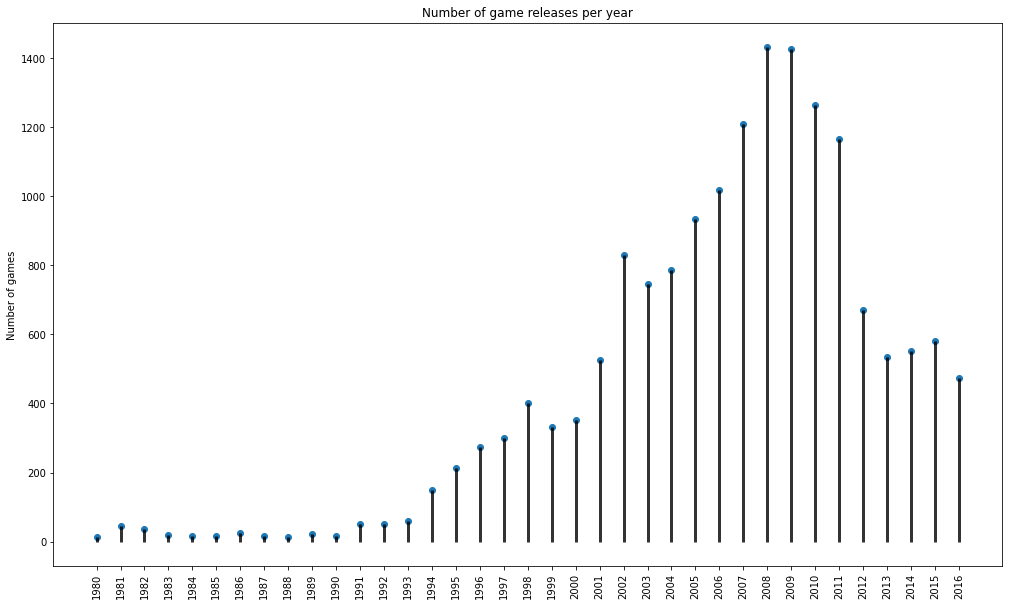

In [67]:
fig, ax = plt.subplots(figsize=(17,10))
ax.vlines(x=per_year_release['year_of_release'],ymin=0,ymax=per_year_release['name'],alpha=0.8,linewidth = 3)
ax.scatter(x=per_year_release['year_of_release'],y=per_year_release['name'])
ax.set_title('Number of game releases per year')
ax.set_ylabel('Number of games')
ax.set_xticks(per_year_release['year_of_release'])
ax.set_xticklabels(per_year_release['year_of_release'],rotation= 90)
# er_year_release.plot(figsize=(12,9))
plt.show()

big impact on 2008-09 with the amount of games releasd
reason for that might be because of PS3 which was released few years before

### Look at how sales varied from platform to platform. 
### Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [68]:
# comparing platforms total sales and 
per_platform = games[['platform','total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index() # create new table
per_platform['sales_std']  = (per_platform['total_sales'] - per_platform['total_sales'].mean()) / per_platform['total_sales'].std() # add new column with std terms for each platfor,
per_platform['color'] = ['green' if x>0 else 'red' for x in per_platform['sales_std']] # color col to use further in plot
per_platform.tail()

,platform,total_sales,sales_std,color
26,ds,804.28,1.493519,green
27,wii,903.31,1.779027,green
28,ps3,935.19,1.870938,green
29,x360,966.67,1.961696,green
30,ps2,1250.92,2.781200,green


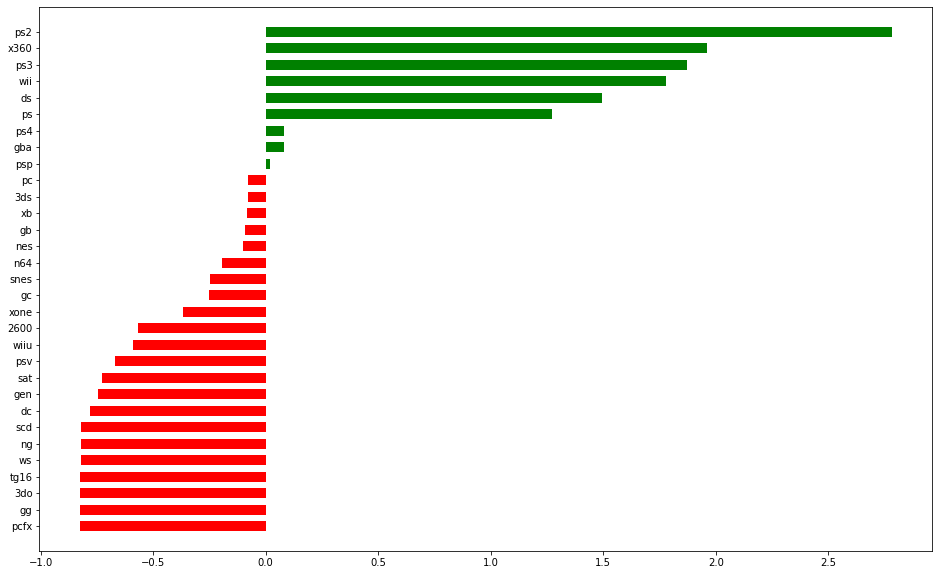

In [69]:
plt.figure(figsize=(16,10),frameon=True,facecolor='white')
plt.hlines(y=per_platform['platform'],xmin=0, xmax=per_platform['sales_std'],color=per_platform['color'],linewidth=10,linestyles='solid')

distribution above for each platform and total sales
top sales are for: PS2, X360 and PS3
 - - - - - - - 


In [70]:
# now lets take PS2 total sales and breakdown by year but first lets see if any records appears before the release of ps2 (2000-1999) so games before will probably considered as outliners:
games = games.drop(games[(games['platform'] == "ps2")  & (games['year_of_release'] <= 1997)].index)

the above incorrect records and will be deleted:

In [71]:
# remove outliners (typo) for x360 as well. platform released on 2005 so outliners are the games before 2003 or so
games = games.drop(games[(games['platform'] == "x360")  & (games['year_of_release'] <= 2003)].index)

In [72]:
# same for ps3:
games = games.drop(games[(games['platform'] == "ps3")  & (games['year_of_release'] <= 2005)].index)

In [73]:
# same for wii - release on 2006:
games = games.drop(games[(games['platform'] == "wii")  & (games['year_of_release'] <= 2004)].index)

In [74]:
# same for ds - release on 2004:
games = games.drop(games[(games['platform'] == "ds")  & (games['year_of_release'] <= 2002)].index)

In [75]:
# same for ps - release on 1994:
games = games.drop(games[(games['platform'] == "ps")  & (games['year_of_release'] <= 1992)].index)

In [76]:
# now we can groupby
plat_year = games.query('platform == "ps2" | platform == "x360"| platform == "ps3"| platform == "wii"| platform == "ds"| platform == "ps"').groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
plat_year.sample()

,year_of_release,platform,total_sales
39,2008,ps3,116.92


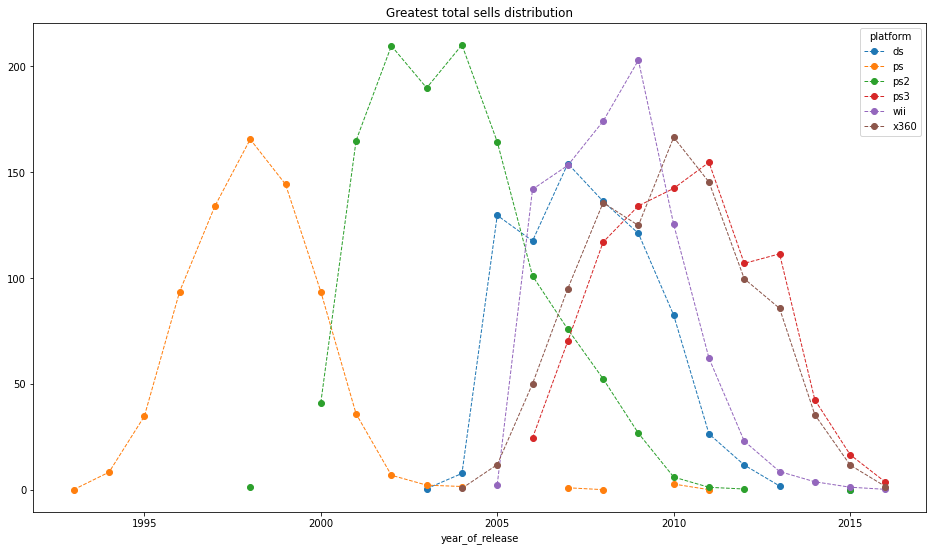

In [77]:
# plot ps
plat_year.pivot('year_of_release','platform','total_sales').plot(
    title='Greatest total sells distribution',figsize=(16,9),linestyle='--',linewidth=1,marker='o')

when taking the 5 top selling platform we can assume that the average lifetime for a platfor is about 11-12 years when the peak of the console is after 5 year approx.
when having a look into ps platforms only we noticed the when the old platform sales starts to decline a new platform released and sales start to rise

### •	Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

As explained above - the period should be for the last 15 years or so to determine the trend for 2017 in terms of each platforms sales or at least expect
trend can be seen at last 5 years in platforms sales so, although the whole lifespan of a platform might be 15 years the trend of rising/declining can be noticed from last 5 years of a platform
I will take data from 2000 only to see any past trends as wll

### •	Work only with the data that you've decided is relevant. Disregard the data for previous years

In [78]:
games_recent = games.query('year_of_release >= 2000').reset_index()
games_recent = games_recent.drop(columns='index')
len(games_recent)

14481

### •	Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [79]:
# will do a heat map comparing the change in total sales for each platform
games_recent_pivot = pd.pivot_table(games_recent,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
change_year_before = games_recent_pivot -games_recent_pivot.shift(1)
change_year_before.head()

platform,2600,3ds,dc,ds,gb,gba,gc,gen,n64,pc,ps,ps2,ps3,ps4,psp,psv,sat,snes,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,-0.93,-0.69,-1.00,0.00,-6.11,52.67,31.02,0.0,-29.78,0.90,-57.67,123.79,0.0,0.00,0.01,0.00,0.00,0.0,0.0,0.0,-0.14,0.00,26.85,0.00
2002,0.00,-0.56,-1.95,0.00,-9.24,13.49,18.65,0.0,-2.57,3.05,-29.01,44.71,0.0,0.37,0.03,0.00,0.04,0.0,0.0,1.8,-0.03,0.00,19.91,0.08
2003,0.00,-0.23,-0.78,0.50,0.00,-23.52,-0.61,0.0,0.00,0.31,-4.67,-19.86,0.0,-0.37,0.00,0.00,-0.04,0.0,0.0,-1.8,0.00,0.00,5.62,-0.08
2004,0.00,0.86,0.00,7.19,0.00,34.02,-20.15,0.0,0.33,2.28,-0.64,20.31,0.0,0.00,8.15,0.17,0.00,0.0,0.0,0.0,0.00,0.67,14.73,0.00


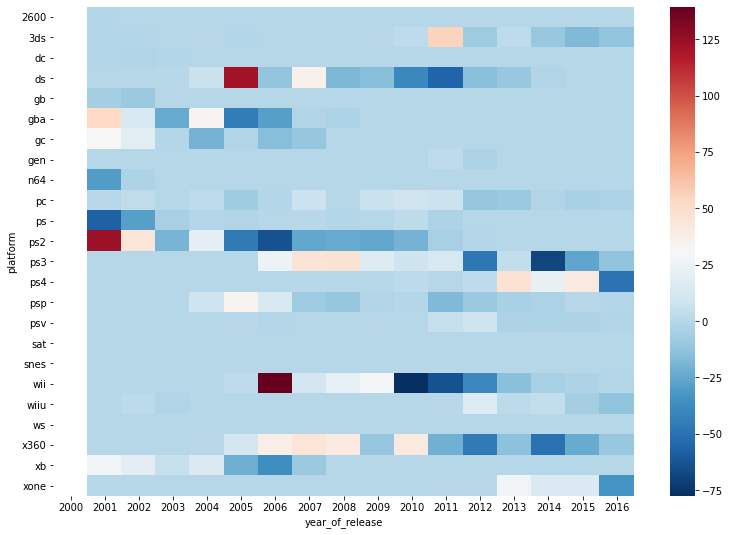

In [80]:
plt.figure(figsize=(13,9),facecolor='white')
sns.heatmap(change_year_before.T,cmap='RdBu_r')
plt.yticks(rotation=0) 
plt.show()

in the above heat map we notice for the change of total sales per each platform from the beginning of 2000
- ds is a good example for uprising and declining after. 2005 was year with a huge sale increase (peak of the platform) which got decreased with some changes in the years after when in 2015 no sales to be seen
- xone is on a decrease from 2013 and we can assume that in 2017 the trend continues
- ps4 as well in a decrease momentum although good sales rising was noticed in the years before 2016
- 2600 platform doesnt seems to be existing anymore nowdays 



### •	Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings. 

In [81]:
# create new df with sales year and platform
games_recent_year_sales = games_recent.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
games_recent_year_sales.head(5)

,platform,year_of_release,total_sales
0,2600,2000,0.93
1,3ds,2000,1.48
2,3ds,2001,0.79
3,3ds,2002,0.23
4,3ds,2004,0.86


In [82]:
# make order by sales:
ordered_recent = games_recent_year_sales.groupby('platform')['total_sales'].sum().sort_values().reset_index()['platform']

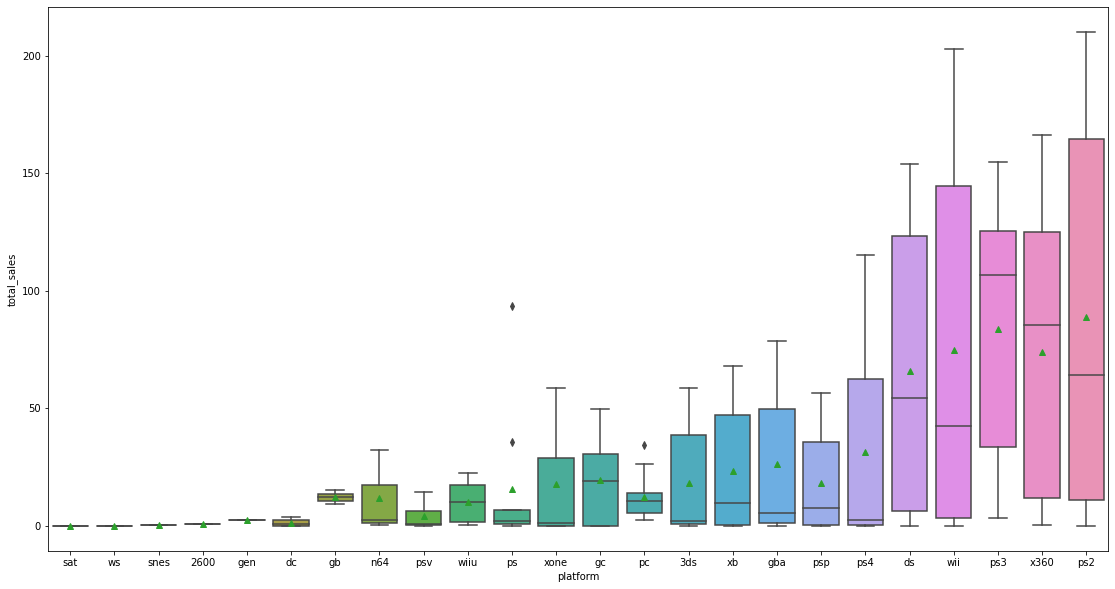

In [83]:
# create boxplot:
plt.figure(figsize=(19,10),facecolor='white')
sns.boxplot(x='platform',y='total_sales',data=games_recent_year_sales,order=ordered_recent,showmeans=True)

sales differs from platform to another and in generations
the main significant platforms are wii ds xbox ps2 /3 /4 /psp
- we can notice that the ps2 has more sales than x360 but also has longer whiskers than mean that in x360 the data is more accurate/consistent
wii has low buttum whisker and a long one in the top which means that the upper 25% has big inconsistent
- ds has betther organized data with shorter whiskers in both ends
skeweness is noted when the mean (green dot) is above or below the median line inside a boxplot
- when the green dot above the line it means that we have positive skewness as noted in ps2 boxplot
- outliers noted in pc as well in ps.
- in ps the ouliers impacted heavily on the mean which is outside the box

### •	Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [84]:
# will have ps2 for this task:
ps2_only = games.query('platform == "ps2"')[['name','critic_score','user_score','total_sales']]
ps2_only.head()

,name,critic_score,user_score,total_sales
17,grand theft auto: san andreas,95.0,9.0,20.81
24,grand theft auto: vice city,95.0,8.7,16.15
28,gran turismo 3: a-spec,95.0,8.4,14.97
38,grand theft auto iii,97.0,8.5,13.10
48,gran turismo 4,89.0,8.5,11.65


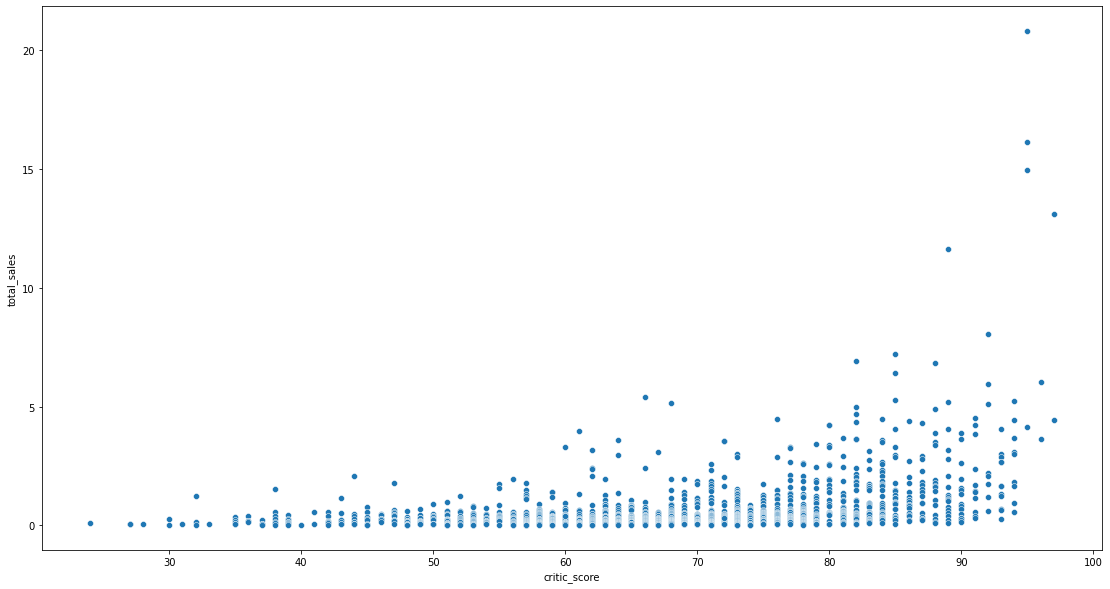

In [85]:
# scatter of critic score and total sales
plt.figure(figsize=(19,10),facecolor='white')
sns.scatterplot(x='critic_score',y='total_sales',data=ps2_only)

In [86]:
ps2_only['critic_score'].corr(ps2_only['total_sales'])

0.3821885514390664

in the scatter plot it is noticeable that as we go upper with the score scale the total sales may rise whereas in the correlation test we see a slight effect of 30% on each other


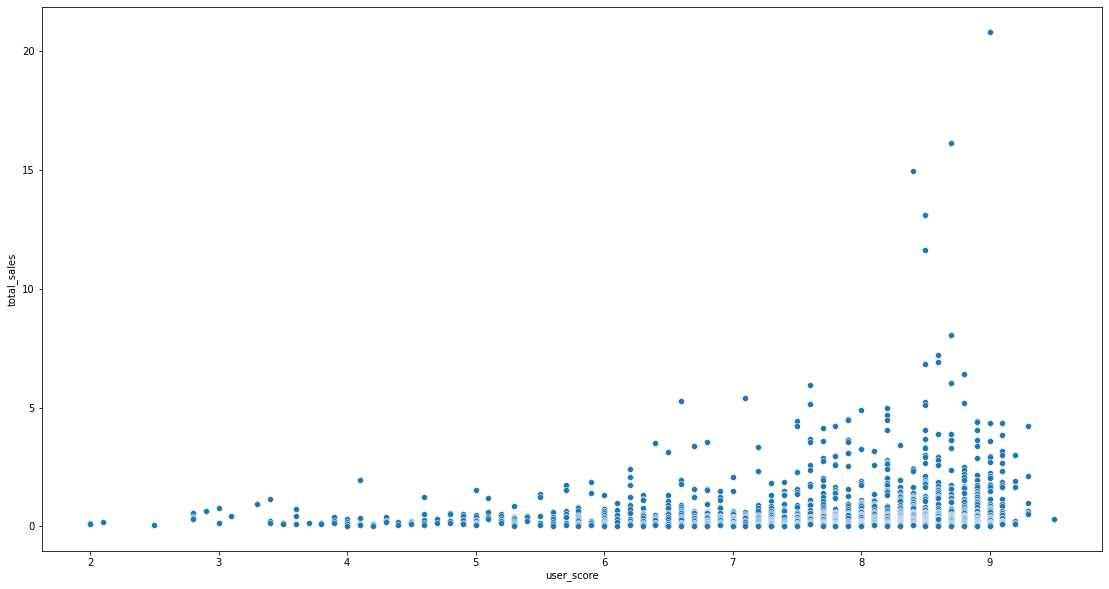

In [87]:
# scatter of user_score and total sales:
plt.figure(figsize=(19,10),facecolor='white')
sns.scatterplot(x='user_score',y='total_sales',data=ps2_only)

In [88]:
ps2_only['user_score'].corr(ps2_only['total_sales'])

0.17882690642976587

very simmilar is here as well
we to notice that the amount os sales in total is getting higher with the grade and pepoele tend to buy high reated games but in correletion test it appears that the impact is very low (about 18%)

### •	Compare the sales of the same games on other platforms.

In [89]:
# for this check will take the most common game:
games['name'].value_counts().head(1)

need for speed: most wanted    11
Name: name, dtype: int64

In [90]:
# will take the most common game accross platforms:
nfs = games[games['name'] == 'need for speed: most wanted'][['name','platform','total_sales']].reset_index()
nfs.drop(columns='index',inplace=True)

In [91]:
nfs_gruouped = nfs.groupby('platform').sum().sort_values(by='total_sales').reset_index()

In [92]:
nfs_gruouped['as_%'] = nfs_gruouped['total_sales'] / nfs_gruouped['total_sales'].sum()
nfs_gruouped

,platform,total_sales,as_%
0,gba,0.26,0.023723
1,ds,0.27,0.024635
2,wiiu,0.27,0.024635
3,pc,0.37,0.033759
4,gc,0.56,0.051095
5,psv,1.01,0.092153
6,xb,1.04,0.094891
7,x360,2.81,0.256387
8,ps2,4.37,0.398723


the winning platfor of NFS is ps2 with almost 40% of total sales with this games
the 2nd in line is x360 with about 25% of total sales

### •	Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [93]:
# making new data by genre:
games_by_genre = games.groupby('genre').sum()['total_sales'].sort_values()
games_by_genre

genre
strategy         173.21
adventure        233.21
puzzle           240.36
simulation       387.19
fighting         446.52
racing           722.73
misc             785.73
platform         812.91
role-playing     921.92
shooter         1046.61
sports          1324.04
action          1733.48
Name: total_sales, dtype: float64

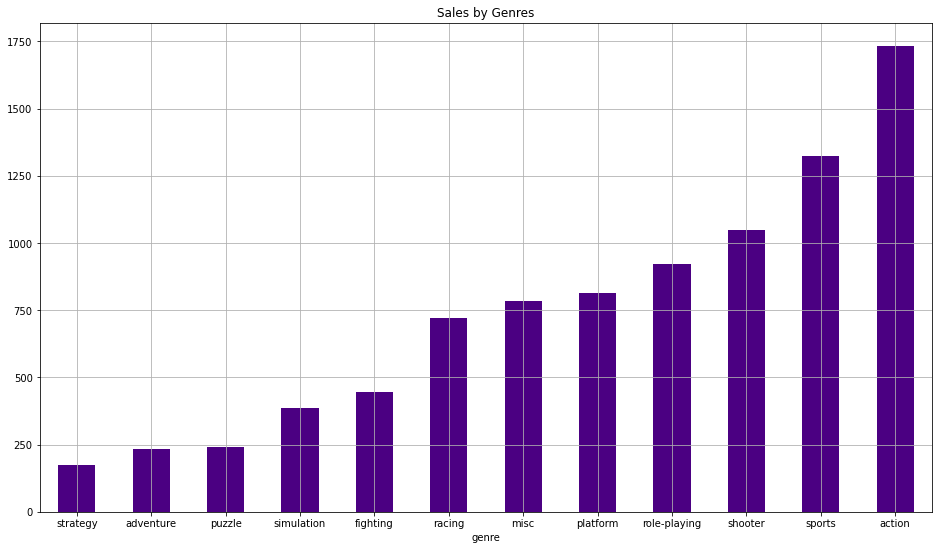

In [94]:
plt.figure(figsize=(16,9),facecolor='white')
games_by_genre.plot(kind='bar',title='Sales by Genres',grid=True,color='indigo')
plt.xticks(rotation='horizontal')
plt.show()

We can generalize the genres by two maion categorize:
1. quick responsive games
2. slow responsive games
The 1st include games like action, sports, shooting and e.g. this type of playing is more intense and has quick rounds of play for the plays.
the 2nd type is with more longer session games like strategym puzzle and adventrues. this is more like a 'marthon' games that differ alot by they meaning from the first type

# Step 4. Create a user profile for each region

For each region (NA, EU, JP), dete

In [95]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

## •	The top five platforms. Describe variations in their market shares from region to region.


In [96]:
# making top 5 genres from each region by sales:
platform_na = games.groupby('platform').sum()['na_sales'].sort_values(ascending=False)[0:5].reset_index()
platform_eu = games.groupby('platform').sum()['eu_sales'].sort_values(ascending=False)[0:5].reset_index()
platform_jp = games.groupby('platform').sum()['jp_sales'].sort_values(ascending=False)[0:5].reset_index()

In [97]:
top_platform_sales = pd.concat([platform_eu,platform_jp,platform_na]).fillna(0).reset_index().drop(columns='index').groupby('platform').sum().reset_index()
top_platform_sales

,platform,eu_sales,jp_sales,na_sales
0,3ds,0.00,100.64,0.00
1,ds,0.00,171.89,373.64
2,ps,211.05,139.62,0.00
3,ps2,336.90,135.13,580.15
4,ps3,324.77,0.00,387.20
5,snes,0.00,116.55,0.00
6,wii,260.39,0.00,490.62
7,x360,268.78,0.00,597.31


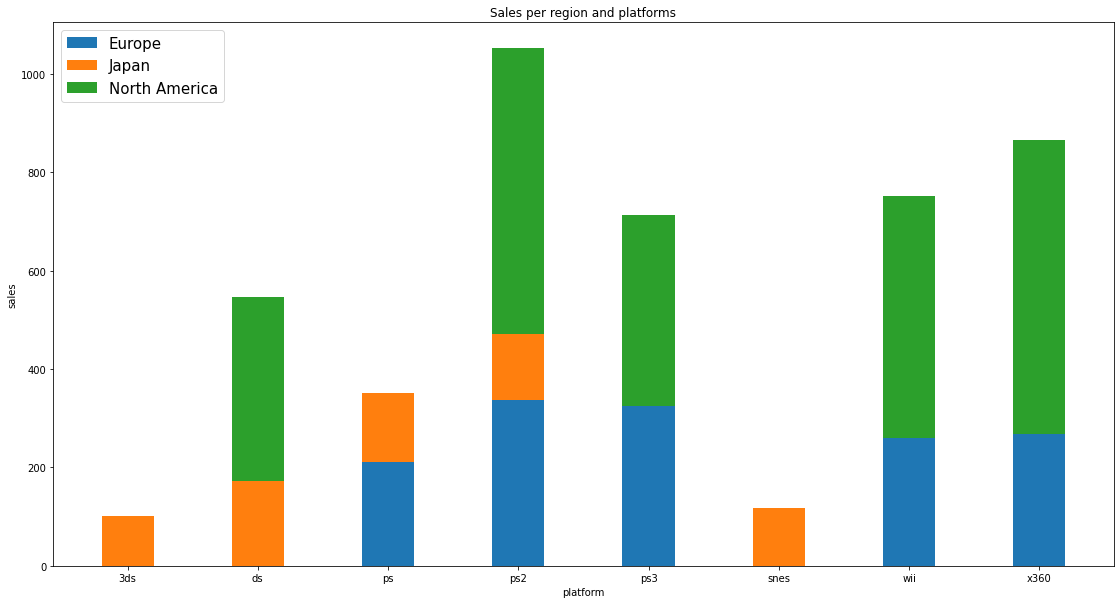

In [98]:
# define variable
plats = top_platform_sales.iloc[:,0]
eu = top_platform_sales.iloc[:,1]
jp = top_platform_sales.iloc[:,2]
na = top_platform_sales.iloc[:,3]
x = np.arange(len(top_platform_sales))

# plotting stacked bars:
plt.figure(figsize=(19,10),facecolor='white')
graph_eu = plt.bar(x=x, height=eu,width=0.4,label='Europe')
graph_jp = plt.bar(x=x, height=jp,width=0.4,bottom=eu,label='Japan')
graph_na = plt.bar(x=x, height=na,width=0.4,bottom=jp+eu,label='North America')
# labels + legend
plt.xlabel('platform')
plt.ylabel('sales')
plt.xticks(x,plats)
plt.title('Sales per region and platforms')
plt.legend(loc='upper left',prop={'size':'15'})
plt.show()


In [99]:
pass

- visualization above shows the distribution of each top 5 platform in every region
- platforms distribution varies
- ps3,wii, x360 is not a top 5 platform in jp
- snes, 3ds seems only succeded in jp whereas
clearly the each platform should aim to specific market and give clients what they most want in terms of video games

## •	The top five genres. Explain the difference.


In [100]:
# bulding for each region:
genre_na = games.groupby('genre').sum()['na_sales'].sort_values(ascending=False)[0:5].reset_index()
genre_eu = games.groupby('genre').sum()['eu_sales'].sort_values(ascending=False)[0:5].reset_index()
genre_jp = games.groupby('genre').sum()['jp_sales'].sort_values(ascending=False)[0:5].reset_index()

In [101]:
# concat all 
top_genre_sales = pd.concat([genre_eu,genre_jp,genre_na]).fillna(0).reset_index().drop(columns='index').groupby('genre').sum().reset_index()
top_genre_sales = top_genre_sales.set_index('genre').T

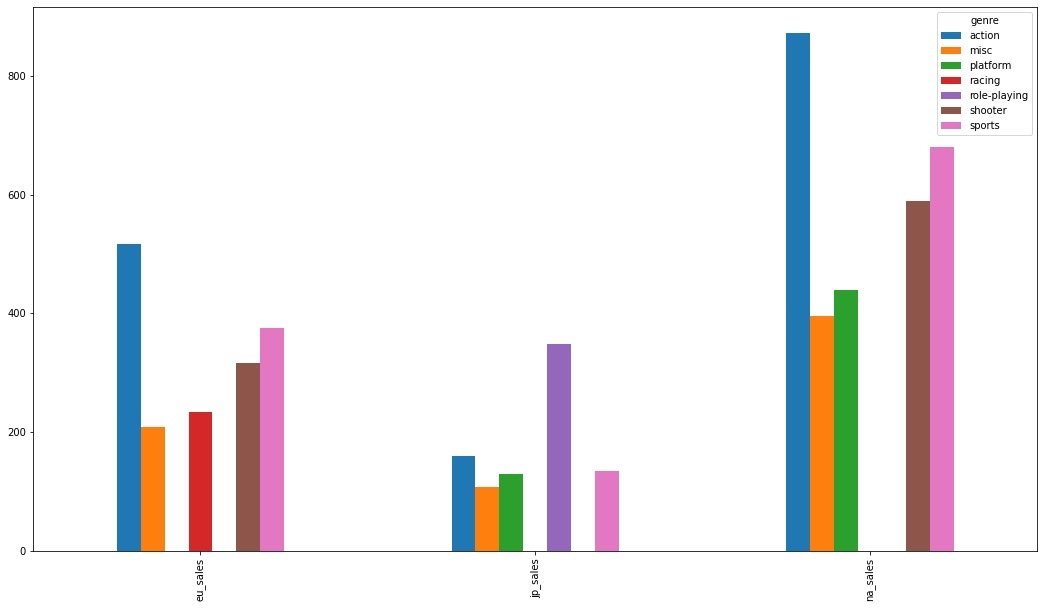

In [102]:
top_genre_sales.plot(kind='bar',figsize=(18,10))

- na is leading as top sales region
- while sports and action genres are the leading genres in eu and na in jp it is the opposite and these genres are minor
- leading genre in jp is role-playing while in na & eu this genre is nnot included in top 5 genres sales
- look like to most similiarity is between eu and na while jp differes

## •	Do ESRB ratings affect sales in individual regions?


In [103]:
# first nan rating values will be replaced with N/A:
games['rating'] = games['rating'].fillna('na')

In [104]:
games.info() # no nan values in this columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16497 entries, 0 to 16079
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16497 non-null  object 
 1   platform         16497 non-null  object 
 2   year_of_release  16497 non-null  int64  
 3   genre            16497 non-null  object 
 4   na_sales         16497 non-null  float64
 5   eu_sales         16497 non-null  float64
 6   jp_sales         16497 non-null  float64
 7   other_sales      16497 non-null  float64
 8   critic_score     8987 non-null   float64
 9   user_score       8588 non-null   float64
 10  rating           16497 non-null  object 
 11  total_sales      16497 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [105]:
# pull needed info for each region seperatley:
na_esrb = games[['na_sales','rating']].reset_index().drop(columns='index')
eu_esrb = games[['eu_sales','rating']].reset_index().drop(columns='index')
jp_esrb = games[['jp_sales','rating']].reset_index().drop(columns='index')

In [106]:
# concat
esrb_sales = pd.concat([na_esrb,eu_esrb,jp_esrb]).fillna(0).reset_index().drop(columns='index').groupby('rating').sum().reset_index()
esrb_sales

,rating,na_sales,eu_sales,jp_sales
0,e,1316.26,723.92,212.81
1,e10+,363.77,192.98,49.23
2,m,770.91,502.85,67.57
3,na,1115.14,541.28,796.56
4,rp,0.00,0.03,0.00
5,t,788.02,443.47,159.38


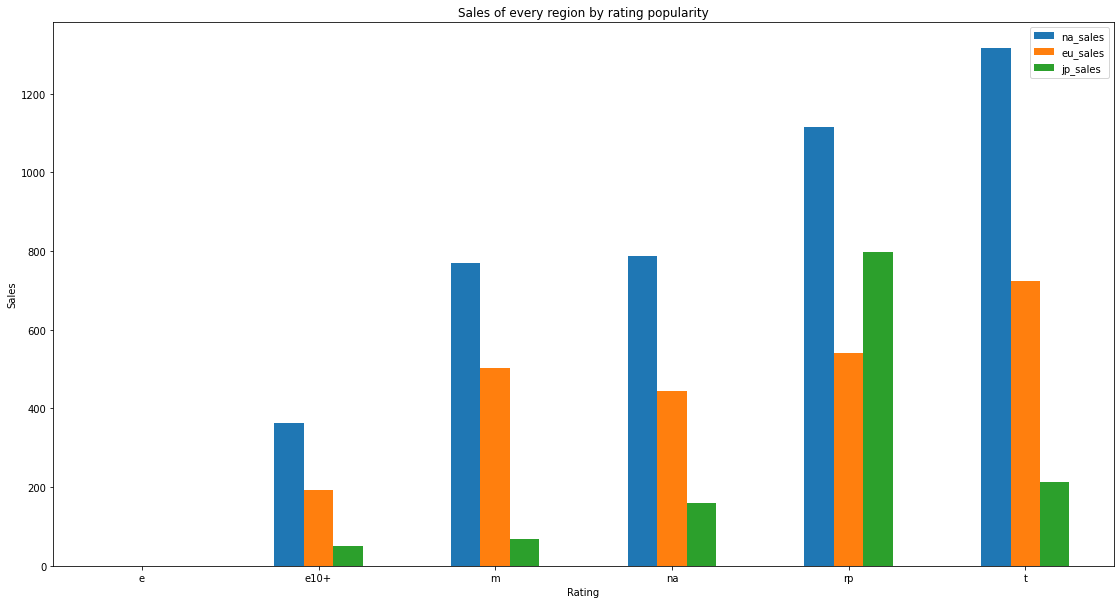

In [107]:
esrb_sales.sort_values(by='na_sales').plot(kind='bar',figsize=(19,10),title='Sales of every region by rating popularity')
plt.xticks(np.arange(len(esrb_sales)),esrb_sales.iloc[:,0])
plt.xticks(rotation='horizontal')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.show()

In [108]:
# although na has many sales we can not tell with data we have what is the relevant rating should be
# we may need reach back to the team who made this data set in order to get the missing data
# after a look into the sells bar chart with na we now drop na to find corr:
esrb_sales = esrb_sales[esrb_sales['rating'] != 'na']

In [109]:
esrb_sales['rating_numeric'] = np.arange(len(esrb_sales))+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
# rating converted to numeric be like:
print('numerical rating \n\n{}  '.format(esrb_sales[['rating','rating_numeric']].set_index('rating')))

numerical rating 

        rating_numeric
rating                
e                    1
e10+                 2
m                    3
rp                   4
t                    5  


In [111]:
# now we can check corr:
print('correlation within North American market between ESRB rating and sales: {}'.format(abs(esrb_sales['rating_numeric'].corr(esrb_sales['na_sales']))))
print('correlation within Japan market between ESRB rating and sales: {}'.format(abs(esrb_sales['rating_numeric'].corr(esrb_sales['jp_sales']))))
print('correlation within Europe market between ESRB rating and sales: {}'.format(abs(esrb_sales['rating_numeric'].corr(esrb_sales['eu_sales']))))

correlation within North American market between ESRB rating and sales: 0.4532259010313053
correlation within Japan market between ESRB rating and sales: 0.28566104457812197
correlation within Europe market between ESRB rating and sales: 0.4237486288330956


- really hard to tell the impact of ESRB rating because of missing values at first since we might have missing very huge amount of relevant data with insightful information
- based on what we received in the bar chart it seems that the bars was acting the different in each region which mean that in eu and na the distribution was almost the same and equal in some rating in jp the situation was different and rp rating was dominant in that area
- another sighn that in the Japannease market the demand to kind of video games differs from eu&na
- both na and eu the results remind each other about 40-40% 
- in our test the abs was applied beacause the figures of 1-5 are randon and could have been determend 5-1 was only made for this little experience

# Step 5. Test the following hypotheses
- assumption that the null hypothesis is correct
- alpha = 0.01
    
  since alpha (significance level) is the probability of making a wrong decision I would prefer minimize the and pick low alpha (1%) and check the test with this probability

In [112]:
alpha = 0.01

## Average user ratings of the Xbox One and PC platforms are the same.


In [113]:
# data reminder
games.platform.unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

creation of 2 relevant population:

In [114]:
# xbox one:
xone = (games
 .query('platform == "xone"')
 .query('user_score.notnull()',engine='python')
 ['user_score']

 )

In [115]:
# pc:
pc = (games
    .query('platform == "pc"')
    .query('user_score.notnull()',engine='python')
    ['user_score']
)


```
H0: μ0 = μ1 \ mean of rating of xone users is equal to mean of pc users

H1: μ0 ≠ μ1 \ mean of rating of xone users is not equal to mean of pc users
```


__if p-value is less than alpha we reject hypothesis__

In [116]:
result = st.ttest_ind(xone, pc)

if result.pvalue < alpha:
    print('Reject H0 hypothesis')
else:
    print('Can\'t reject H0 hypothesis')

print('p-value: {}'.format(result.pvalue))

Reject H0 hypothesis
p-value: 2.135938985221249e-06


- - - - - - 
We reject null hypothesis mean that the mean of two platform user score are not the same

means of the score differs between pc and xone which may indicate users for each platform evaluate games in different manners for each platform
- - - - - 

## Average user ratings for the Action and Sports genres are different.

In [117]:
action =(
    games
 .query('genre == "action"')
 .query('user_score.notnull()',engine='python')
 ['user_score']
)

In [118]:
sports = (
    games
    .query('genre == "sports"')
    .query('user_score.notnull()',engine='python')
    ['user_score']
)


```
H0: μ0 = μ1 \ users scores mean in action genres is equal to mean in sports genres

H1: μ0 ≠ μ1 \ users scores mean in action genres is not equal to mean in sports genres
```


__if p-value is less than alpha we reject hypothesis__

In [119]:
result = st.ttest_ind(sports, action)

if result.pvalue < alpha:
    print('Reject H0 hypothesis')
else:
    print('Can\'t reject H0 hypothesis')

print('p-value: {}'.format(result.pvalue))

Can't reject H0 hypothesis
p-value: 0.13472871321618837


Can't reject null hypothesis means that we can't reject the possibility of user scores mean between these 2 genres are different.
this may indicate for possibilty that eventhough the genres are different the users may categorize the genres in the same possible way

# Step 6. Write a general conclusion


---



---





- It is clearly seen that the markets may differ from each other on extreme way from the popularity of one console compared to another in other region
- Jappanease market seems to have the main differences while the NA and EU do remind themselves in a few graphs we mentioned in the project
- When testing top 5 platform total sales NA came in first place
- When looking worldwide users prefer their games to be in quick session rather then having long session games
- Eventhough many ratings where NaN values we still mangaged to check influence of user scores in t-tests receive quit large sammples from each group to each test when the gaussian theory approved to be existed in the minmum of n>30

